# Violaciones de los Supuestos de Regresión Lineal

Este notebook demuestra gráficamente cómo pueden violarse los cuatro supuestos principales de la regresión lineal:

1. **Linealidad**: La relación entre X e Y debe ser lineal
2. **Independencia**: Los errores no deben estar correlacionados
3. **Homocedasticidad**: Varianza constante de los errores
4. **Normalidad**: Los errores siguen distribución normal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Violación del Supuesto de Linealidad

El supuesto de linealidad requiere que la relación entre X e Y sea lineal. Cuando esto se viola, un modelo lineal será inadecuado.

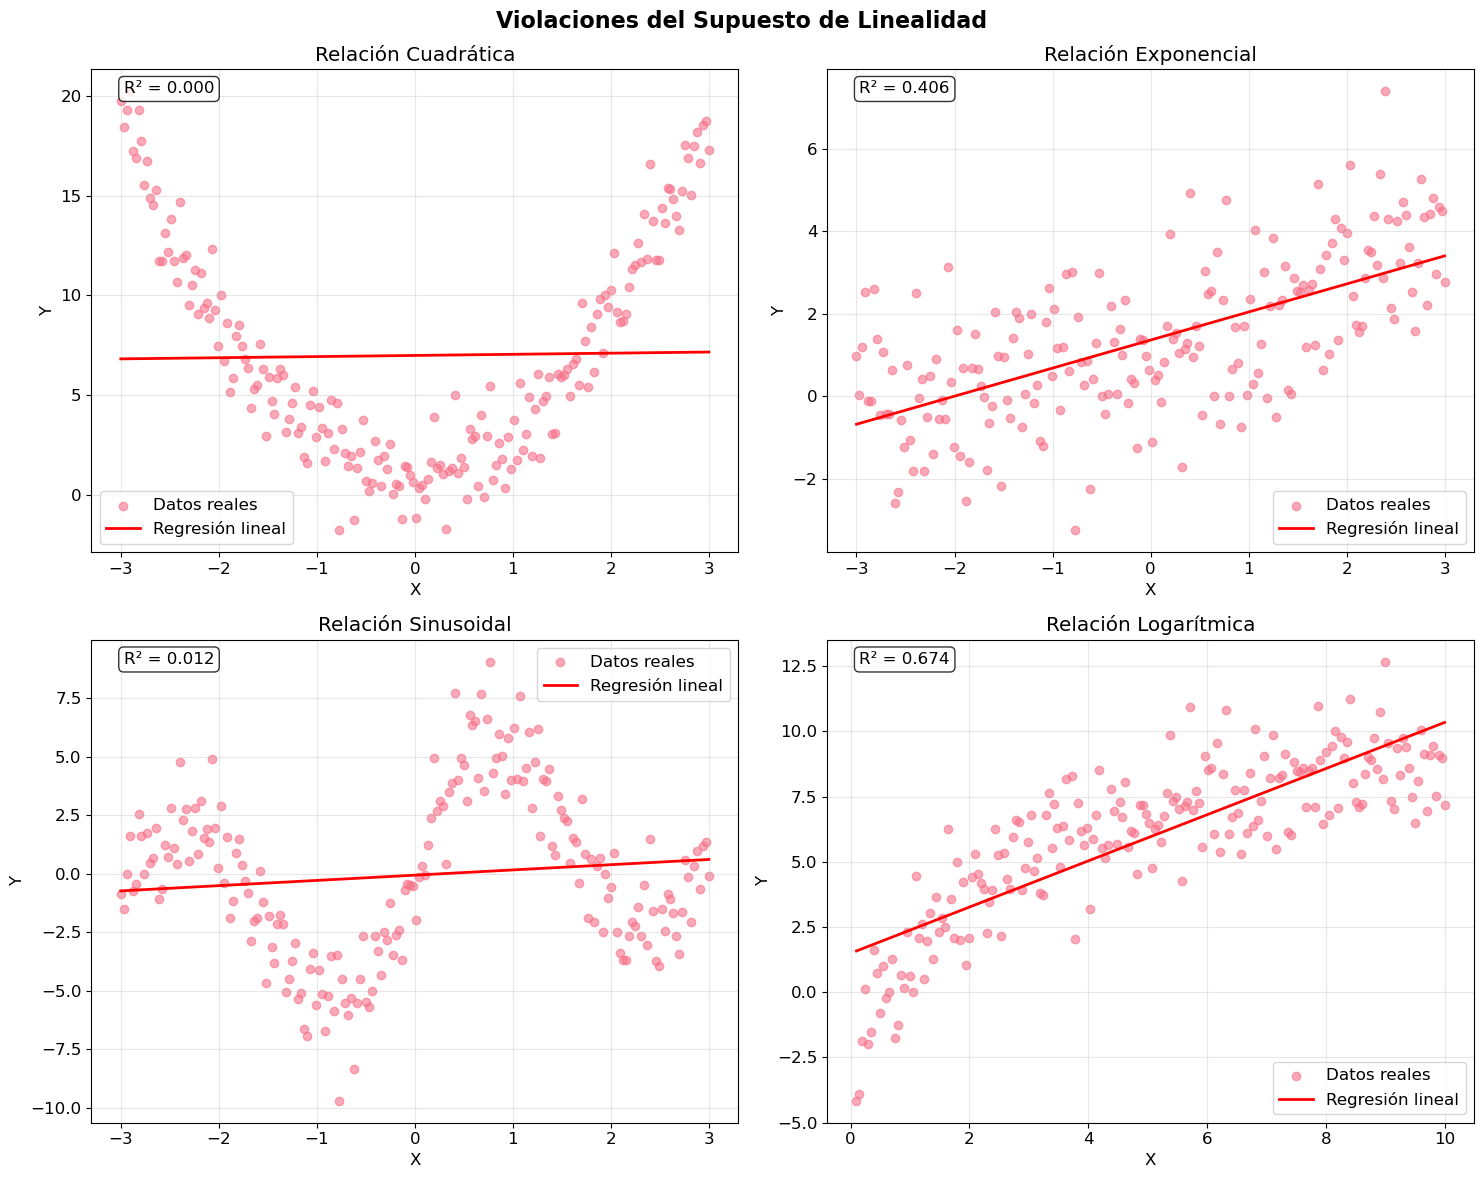

In [2]:
def crear_datos_no_lineales(n=200, tipo='cuadratico', noise=1.0, seed=42):
    """Genera datos con relaciones no lineales"""
    np.random.seed(seed)
    x = np.linspace(-3, 3, n)
    
    if tipo == 'cuadratico':
        y = 2 * x**2 + 1 + np.random.normal(0, noise, n)
        titulo = "Relación Cuadrática"
    elif tipo == 'exponencial':
        y = np.exp(x/2) + np.random.normal(0, noise, n)
        titulo = "Relación Exponencial"
    elif tipo == 'sinusoidal':
        y = 5 * np.sin(2*x) + x + np.random.normal(0, noise, n)
        titulo = "Relación Sinusoidal"
    elif tipo == 'logaritmico':
        x = np.linspace(0.1, 10, n)
        y = 3 * np.log(x) + 2 + np.random.normal(0, noise, n)
        titulo = "Relación Logarítmica"
    
    return x, y, titulo

# Crear subplots para diferentes tipos de no linealidad
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Violaciones del Supuesto de Linealidad', fontsize=16, fontweight='bold')

tipos = ['cuadratico', 'exponencial', 'sinusoidal', 'logaritmico']

for i, tipo in enumerate(tipos):
    row = i // 2
    col = i % 2
    
    x, y, titulo = crear_datos_no_lineales(tipo=tipo, noise=1.5)
    
    # Ajustar modelo lineal
    lr = LinearRegression()
    X_reshaped = x.reshape(-1, 1)
    lr.fit(X_reshaped, y)
    y_pred = lr.predict(X_reshaped)
    
    # Gráfico
    axes[row, col].scatter(x, y, alpha=0.6, label='Datos reales')
    axes[row, col].plot(x, y_pred, 'r-', linewidth=2, label='Regresión lineal')
    axes[row, col].set_title(titulo)
    axes[row, col].set_xlabel('X')
    axes[row, col].set_ylabel('Y')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    # Calcular R²
    r2 = lr.score(X_reshaped, y)
    axes[row, col].text(0.05, 0.95, f'R² = {r2:.3f}', 
                        transform=axes[row, col].transAxes, 
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Diagnóstico: Gráficos de Residuos vs Valores Predichos

Una forma de detectar no linealidad es examinar los residuos. Si hay patrones en los residuos, indica problemas con el modelo.

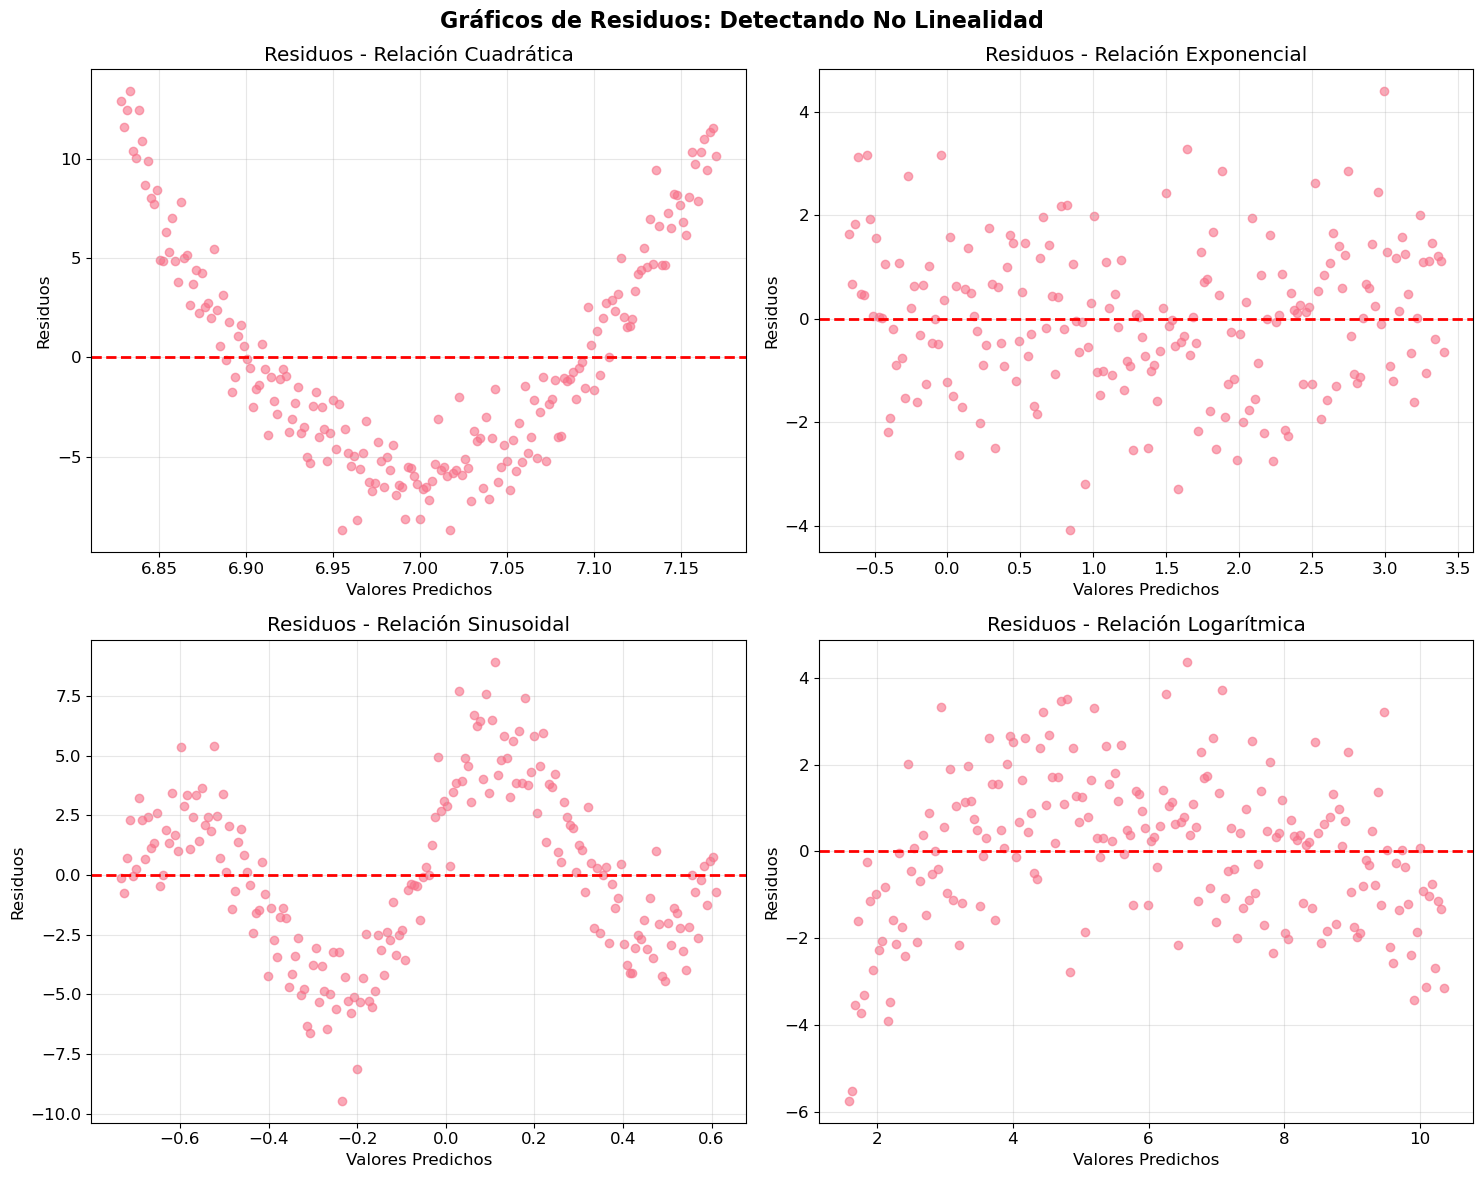

📊 INTERPRETACIÓN:
✅ Residuos aleatorios alrededor de 0 = Linealidad OK
❌ Patrones en residuos = Violación de linealidad
   - Curva: Relación cuadrática o polinomial
   - Tendencia: Relación exponencial o logarítmica
   - Oscilación: Efectos cíclicos o sinusoidales


In [3]:
# Crear gráficos de residuos para detectar no linealidad
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Gráficos de Residuos: Detectando No Linealidad', fontsize=16, fontweight='bold')

for i, tipo in enumerate(tipos):
    row = i // 2
    col = i % 2
    
    x, y, titulo = crear_datos_no_lineales(tipo=tipo, noise=1.5)
    
    # Ajustar modelo lineal
    lr = LinearRegression()
    X_reshaped = x.reshape(-1, 1)
    lr.fit(X_reshaped, y)
    y_pred = lr.predict(X_reshaped)
    residuos = y - y_pred
    
    # Gráfico de residuos
    axes[row, col].scatter(y_pred, residuos, alpha=0.6)
    axes[row, col].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[row, col].set_title(f'Residuos - {titulo}')
    axes[row, col].set_xlabel('Valores Predichos')
    axes[row, col].set_ylabel('Residuos')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 INTERPRETACIÓN:")
print("✅ Residuos aleatorios alrededor de 0 = Linealidad OK")
print("❌ Patrones en residuos = Violación de linealidad")
print("   - Curva: Relación cuadrática o polinomial")
print("   - Tendencia: Relación exponencial o logarítmica")
print("   - Oscilación: Efectos cíclicos o sinusoidales")

## Solución

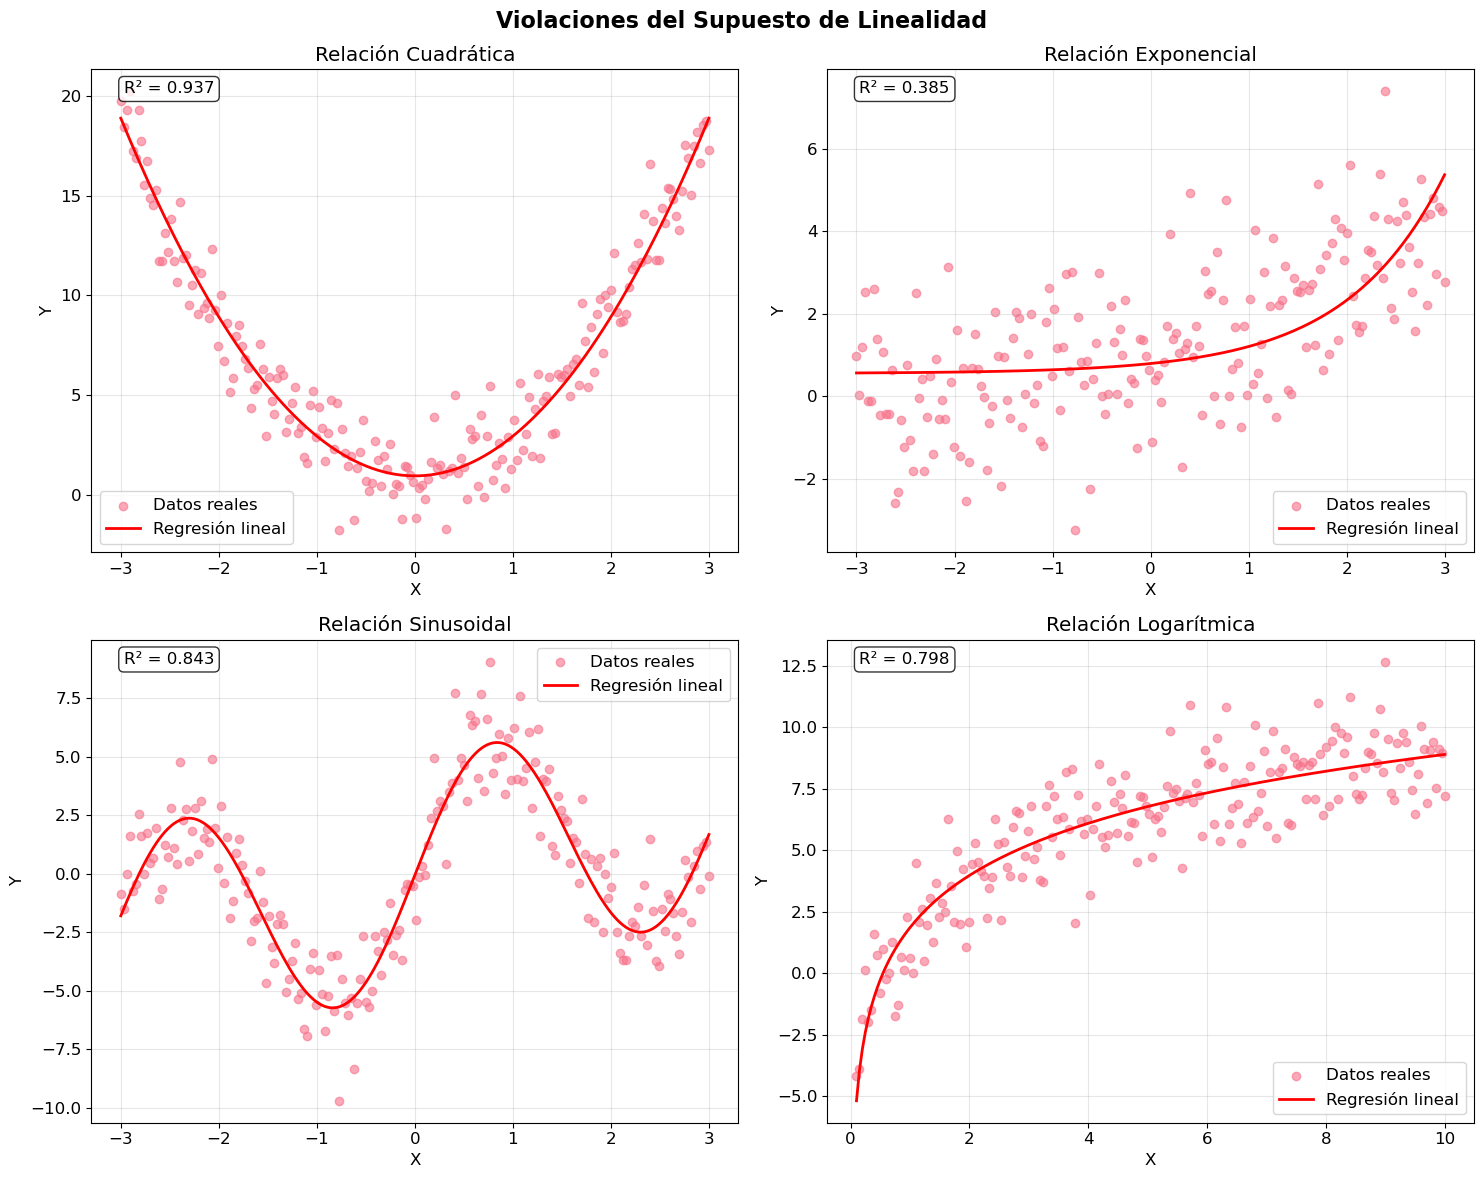

In [4]:
# Crear subplots para diferentes tipos de no linealidad
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Violaciones del Supuesto de Linealidad', fontsize=16, fontweight='bold')


for i, tipo in enumerate(tipos):
    row = i // 2
    col = i % 2
    
    x, y, titulo = crear_datos_no_lineales(tipo=tipo, noise=1.5)
    
    # Ajustar modelo lineal
    lr = LinearRegression()
    X_reshaped = x.reshape(-1, 1)
    if tipo == "cuadratico":
        X_reshaped = X_reshaped**2
    if tipo == "exponencial":
        X_reshaped = np.exp(X_reshaped)
    if tipo == "sinusoidal":
        X_reshaped = np.concatenate((np.sin(2*X_reshaped), X_reshaped), axis = 1)
    if tipo == "logaritmico":
        X_reshaped = np.log(X_reshaped)
    lr.fit(X_reshaped, y)
    y_pred = lr.predict(X_reshaped)
    
    # Gráfico
    axes[row, col].scatter(x, y, alpha=0.6, label='Datos reales')
    axes[row, col].plot(x, y_pred, 'r-', linewidth=2, label='Regresión lineal')
    axes[row, col].set_title(titulo)
    axes[row, col].set_xlabel('X')
    axes[row, col].set_ylabel('Y')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)
    
    # Calcular R²
    r2 = lr.score(X_reshaped, y)
    axes[row, col].text(0.05, 0.95, f'R² = {r2:.3f}', 
                        transform=axes[row, col].transAxes, 
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

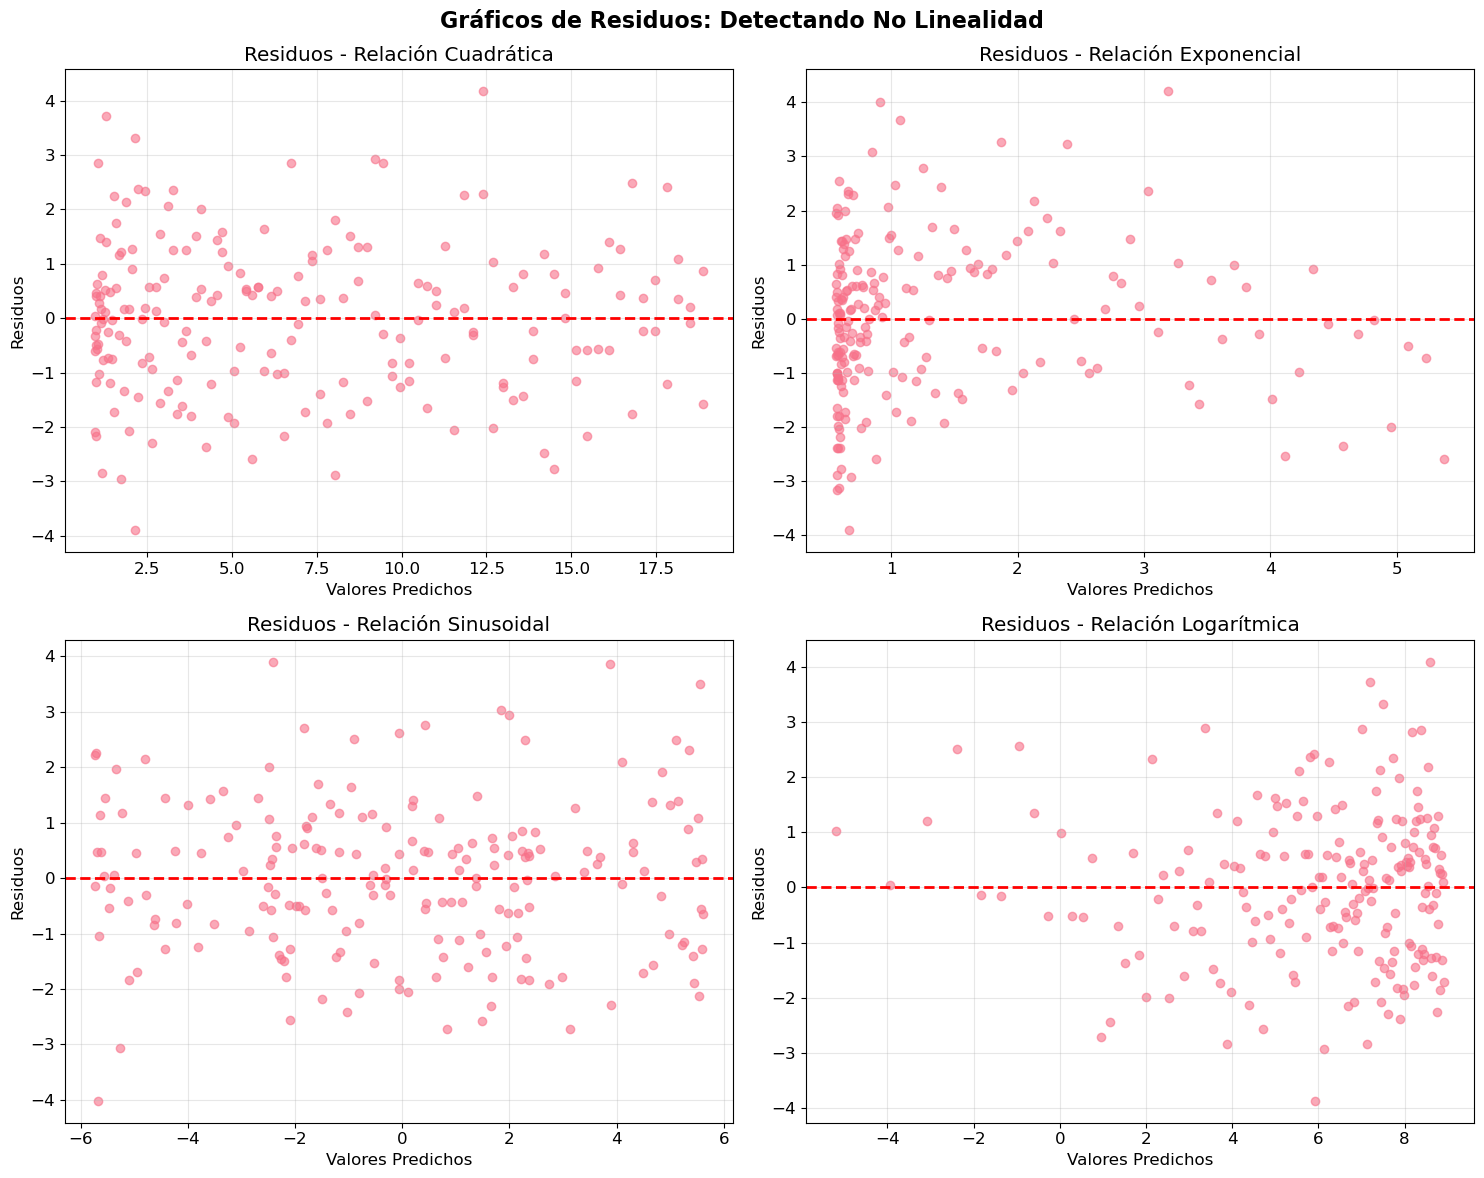

In [5]:
# Crear gráficos de residuos para detectar no linealidad
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Gráficos de Residuos: Detectando No Linealidad', fontsize=16, fontweight='bold')

for i, tipo in enumerate(tipos):
    row = i // 2
    col = i % 2
    
    x, y, titulo = crear_datos_no_lineales(tipo=tipo, noise=1.5)
    
    # Ajustar modelo lineal
    lr = LinearRegression()
    X_reshaped = x.reshape(-1, 1)
    if tipo == "cuadratico":
        X_reshaped = X_reshaped**2
    if tipo == "exponencial":
        X_reshaped = np.exp(X_reshaped)
    if tipo == "sinusoidal":
        X_reshaped = np.concatenate((np.sin(2*X_reshaped), X_reshaped), axis = 1)
    if tipo == "logaritmico":
        X_reshaped = np.log(X_reshaped)
    lr.fit(X_reshaped, y)
    y_pred = lr.predict(X_reshaped)
    residuos = y - y_pred
    
    # Gráfico de residuos
    axes[row, col].scatter(y_pred, residuos, alpha=0.6)
    axes[row, col].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[row, col].set_title(f'Residuos - {titulo}')
    axes[row, col].set_xlabel('Valores Predichos')
    axes[row, col].set_ylabel('Residuos')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Violación del Supuesto de Independencia

Los errores deben ser independientes entre sí. Esto es especialmente importante en datos de series temporales.

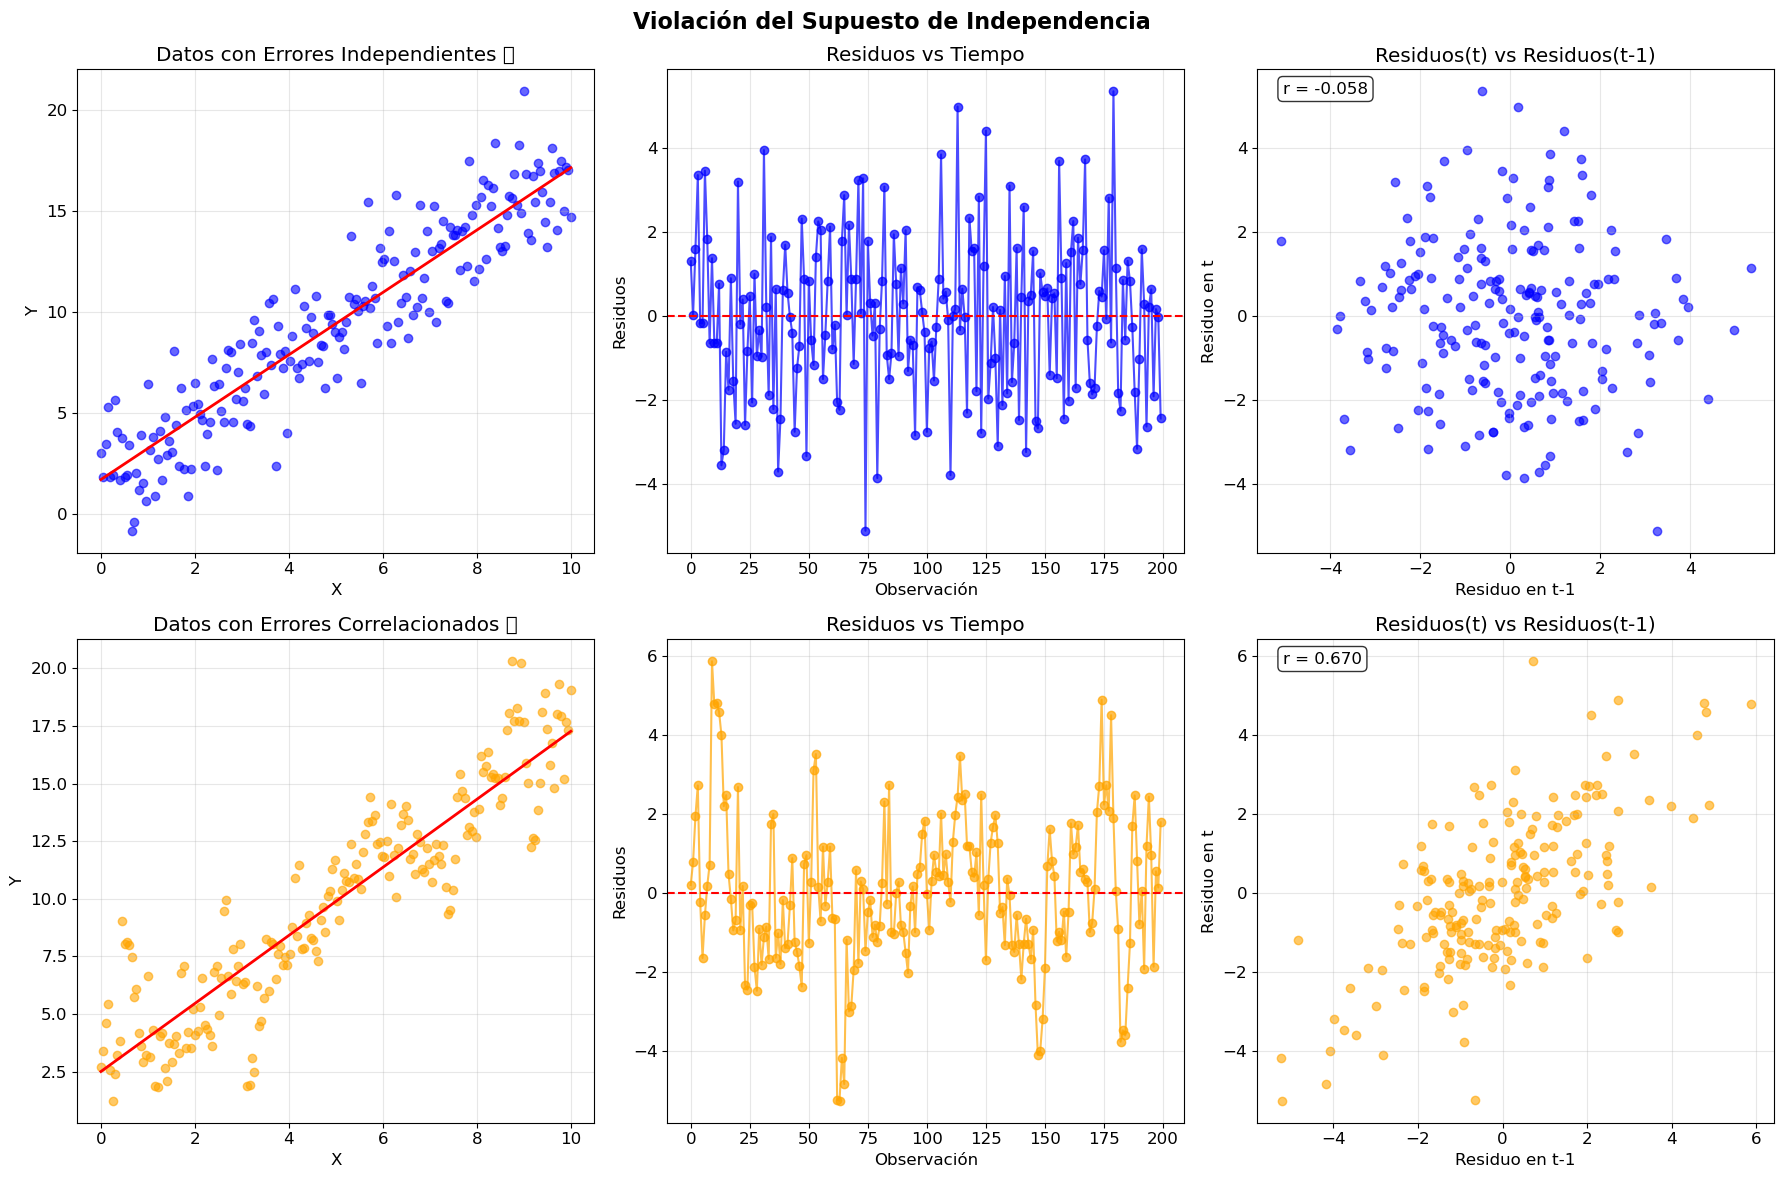

📊 INTERPRETACIÓN:
✅ Errores independientes: correlación = -0.058 (cerca de 0)
❌ Errores correlacionados: correlación = 0.670 (lejos de 0)

🔍 DIAGNÓSTICO:
- Gráfico temporal: patrones o tendencias en residuos
- Autocorrelación: correlación significativa entre residuos consecutivos
- Prueba Durbin-Watson: estadístico cerca de 2 = independencia


In [6]:
def crear_datos_correlacionados(n=200, correlacion=0.7, seed=42):
    """Genera datos con errores correlacionados (autocorrelación)"""
    np.random.seed(seed)
    
    # Datos independientes (correctos)
    x = np.linspace(0, 10, n)
    errores_independientes = np.random.normal(0, 2, n)
    y_independiente = 2 + 1.5 * x + errores_independientes
    
    # Datos con autocorrelación (violación)
    errores_correlacionados = np.zeros(n)
    errores_correlacionados[0] = np.random.normal(0, 2)
    
    for i in range(1, n):
        errores_correlacionados[i] = (correlacion * errores_correlacionados[i-1] + 
                                     np.sqrt(1 - correlacion**2) * np.random.normal(0, 2))
    
    y_correlacionado = 2 + 1.5 * x + errores_correlacionados
    
    return x, y_independiente, y_correlacionado, errores_independientes, errores_correlacionados

# Generar datos
x, y_indep, y_corr, err_indep, err_corr = crear_datos_correlacionados()

# Ajustar modelos
lr_indep = LinearRegression().fit(x.reshape(-1, 1), y_indep)
lr_corr = LinearRegression().fit(x.reshape(-1, 1), y_corr)

y_pred_indep = lr_indep.predict(x.reshape(-1, 1))
y_pred_corr = lr_corr.predict(x.reshape(-1, 1))

residuos_indep = y_indep - y_pred_indep
residuos_corr = y_corr - y_pred_corr

# Crear gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Violación del Supuesto de Independencia', fontsize=16, fontweight='bold')

# Fila 1: Datos independientes (correctos)
axes[0, 0].scatter(x, y_indep, alpha=0.6, color='blue')
axes[0, 0].plot(x, y_pred_indep, 'r-', linewidth=2)
axes[0, 0].set_title('Datos con Errores Independientes ✅')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(residuos_indep, 'o-', alpha=0.7, color='blue')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_title('Residuos vs Tiempo')
axes[0, 1].set_xlabel('Observación')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].scatter(residuos_indep[:-1], residuos_indep[1:], alpha=0.6, color='blue')
axes[0, 2].set_title('Residuos(t) vs Residuos(t-1)')
axes[0, 2].set_xlabel('Residuo en t-1')
axes[0, 2].set_ylabel('Residuo en t')
axes[0, 2].grid(True, alpha=0.3)

# Calcular correlación
corr_indep = np.corrcoef(residuos_indep[:-1], residuos_indep[1:])[0, 1]
axes[0, 2].text(0.05, 0.95, f'r = {corr_indep:.3f}', 
                transform=axes[0, 2].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Fila 2: Datos correlacionados (violación)
axes[1, 0].scatter(x, y_corr, alpha=0.6, color='orange')
axes[1, 0].plot(x, y_pred_corr, 'r-', linewidth=2)
axes[1, 0].set_title('Datos con Errores Correlacionados ❌')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(residuos_corr, 'o-', alpha=0.7, color='orange')
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title('Residuos vs Tiempo')
axes[1, 1].set_xlabel('Observación')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].scatter(residuos_corr[:-1], residuos_corr[1:], alpha=0.6, color='orange')
axes[1, 2].set_title('Residuos(t) vs Residuos(t-1)')
axes[1, 2].set_xlabel('Residuo en t-1')
axes[1, 2].set_ylabel('Residuo en t')
axes[1, 2].grid(True, alpha=0.3)

# Calcular correlación
corr_corr = np.corrcoef(residuos_corr[:-1], residuos_corr[1:])[0, 1]
axes[1, 2].text(0.05, 0.95, f'r = {corr_corr:.3f}', 
                transform=axes[1, 2].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 INTERPRETACIÓN:")
print(f"✅ Errores independientes: correlación = {corr_indep:.3f} (cerca de 0)")
print(f"❌ Errores correlacionados: correlación = {corr_corr:.3f} (lejos de 0)")
print("\n🔍 DIAGNÓSTICO:")
print("- Gráfico temporal: patrones o tendencias en residuos")
print("- Autocorrelación: correlación significativa entre residuos consecutivos")
print("- Prueba Durbin-Watson: estadístico cerca de 2 = independencia")

## 3. Violación del Supuesto de Homocedasticidad

La varianza de los errores debe ser constante. Cuando varía, tenemos heterocedasticidad.

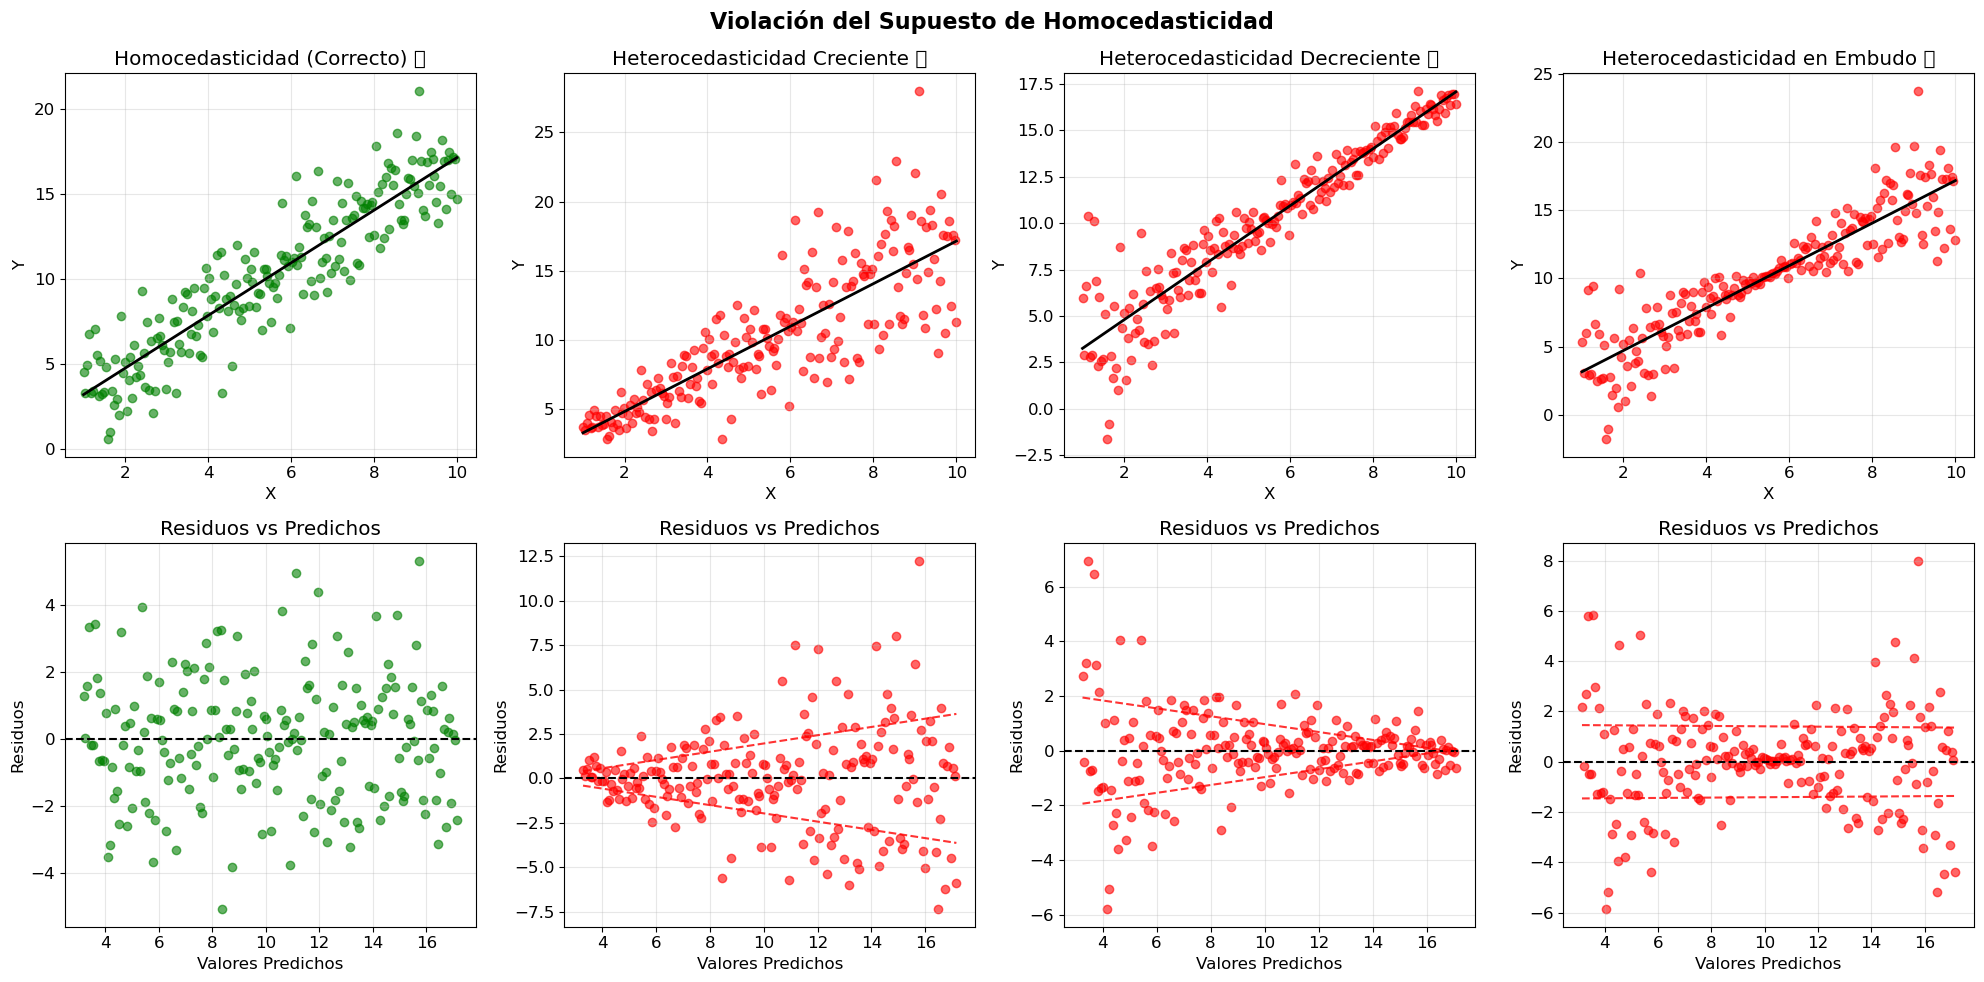

📊 INTERPRETACIÓN:
✅ Homocedasticidad: Residuos con dispersión constante
❌ Heterocedasticidad: Residuos con dispersión variable

🔍 PATRONES COMUNES:
- Embudo creciente: Varianza aumenta con valores predichos
- Embudo decreciente: Varianza disminuye con valores predichos
- Forma de diamante: Varianza máxima en valores medios


In [7]:
def crear_datos_heteroscedasticos(n=200, tipo='creciente', seed=42):
    """Genera datos con diferentes tipos de heterocedasticidad"""
    np.random.seed(seed)
    x = np.linspace(1, 10, n)
    
    if tipo == 'homoscedastico':
        # Varianza constante (correcto)
        error = np.random.normal(0, 2, n)
        titulo = "Homocedasticidad (Correcto) ✅"
    elif tipo == 'creciente':
        # Varianza aumenta con X
        error = np.random.normal(0, 0.5 * x, n)
        titulo = "Heterocedasticidad Creciente ❌"
    elif tipo == 'decreciente':
        # Varianza disminuye con X
        error = np.random.normal(0, 5 / x, n)
        titulo = "Heterocedasticidad Decreciente ❌"
    elif tipo == 'embudo':
        # Forma de embudo
        error = np.random.normal(0, 0.1 + 0.8 * np.abs(x - 5.5), n)
        titulo = "Heterocedasticidad en Embudo ❌"
    
    y = 2 + 1.5 * x + error
    return x, y, titulo

# Crear diferentes tipos de heterocedasticidad
tipos_het = ['homoscedastico', 'creciente', 'decreciente', 'embudo']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Violación del Supuesto de Homocedasticidad', fontsize=16, fontweight='bold')

for i, tipo in enumerate(tipos_het):
    x, y, titulo = crear_datos_heteroscedasticos(tipo=tipo)
    
    # Ajustar modelo
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    y_pred = lr.predict(x.reshape(-1, 1))
    residuos = y - y_pred
    
    # Gráfico de datos
    color = 'green' if tipo == 'homoscedastico' else 'red'
    axes[0, i].scatter(x, y, alpha=0.6, color=color)
    axes[0, i].plot(x, y_pred, 'black', linewidth=2)
    axes[0, i].set_title(titulo)
    axes[0, i].set_xlabel('X')
    axes[0, i].set_ylabel('Y')
    axes[0, i].grid(True, alpha=0.3)
    
    # Gráfico de residuos
    axes[1, i].scatter(y_pred, residuos, alpha=0.6, color=color)
    axes[1, i].axhline(y=0, color='black', linestyle='--')
    axes[1, i].set_title(f'Residuos vs Predichos')
    axes[1, i].set_xlabel('Valores Predichos')
    axes[1, i].set_ylabel('Residuos')
    axes[1, i].grid(True, alpha=0.3)
    
    # Añadir líneas de tendencia en residuos para visualizar heterocedasticidad
    if tipo != 'homoscedastico':
        z = np.polyfit(y_pred, np.abs(residuos), 1)
        p = np.poly1d(z)
        axes[1, i].plot(y_pred, p(y_pred), "r--", alpha=0.8)
        axes[1, i].plot(y_pred, -p(y_pred), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

print("📊 INTERPRETACIÓN:")
print("✅ Homocedasticidad: Residuos con dispersión constante")
print("❌ Heterocedasticidad: Residuos con dispersión variable")
print("\n🔍 PATRONES COMUNES:")
print("- Embudo creciente: Varianza aumenta con valores predichos")
print("- Embudo decreciente: Varianza disminuye con valores predichos")
print("- Forma de diamante: Varianza máxima en valores medios")

### Prueba Estadística: Test de Breusch-Pagan

Una prueba formal para detectar heterocedasticidad.

In [8]:
from scipy.stats import chi2

def breusch_pagan_test(residuos, x):
    """Implementa el test de Breusch-Pagan para heterocedasticidad"""
    n = len(residuos)
    
    # Regresión de residuos al cuadrado sobre X
    residuos_cuadrados = residuos**2
    lr_bp = LinearRegression()
    lr_bp.fit(x.reshape(-1, 1), residuos_cuadrados)
    
    # R² de la regresión auxiliar
    r2_bp = lr_bp.score(x.reshape(-1, 1), residuos_cuadrados)
    
    # Estadístico de prueba
    lm_statistic = n * r2_bp
    
    # P-value (distribución chi-cuadrado con 1 grado de libertad)
    p_value = 1 - chi2.cdf(lm_statistic, df=1)
    
    return lm_statistic, p_value

print("🧪 TEST DE BREUSCH-PAGAN PARA HETEROCEDASTICIDAD\n")
print("H₀: Homocedasticidad (varianza constante)")
print("H₁: Heterocedasticidad (varianza no constante)\n")

for tipo in tipos_het:
    x, y, titulo = crear_datos_heteroscedasticos(tipo=tipo)
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    residuos = y - lr.predict(x.reshape(-1, 1))
    
    lm_stat, p_val = breusch_pagan_test(residuos, x)
    
    resultado = "RECHAZA H₀" if p_val < 0.05 else "NO RECHAZA H₀"
    emoji = "❌" if p_val < 0.05 else "✅"
    
    print(f"{emoji} {tipo.upper():15} | LM = {lm_stat:6.2f} | p-value = {p_val:.4f} | {resultado}")

print("\n💡 Interpretación: p-value < 0.05 indica heterocedasticidad")

🧪 TEST DE BREUSCH-PAGAN PARA HETEROCEDASTICIDAD

H₀: Homocedasticidad (varianza constante)
H₁: Heterocedasticidad (varianza no constante)

✅ HOMOSCEDASTICO  | LM =   0.00 | p-value = 0.9588 | NO RECHAZA H₀
❌ CRECIENTE       | LM =  27.79 | p-value = 0.0000 | RECHAZA H₀
❌ DECRECIENTE     | LM =  31.91 | p-value = 0.0000 | RECHAZA H₀
✅ EMBUDO          | LM =   0.14 | p-value = 0.7122 | NO RECHAZA H₀

💡 Interpretación: p-value < 0.05 indica heterocedasticidad


## 4. Violación del Supuesto de Normalidad

Los errores deben seguir una distribución normal. Esto es crucial para las pruebas de hipótesis y intervalos de confianza.

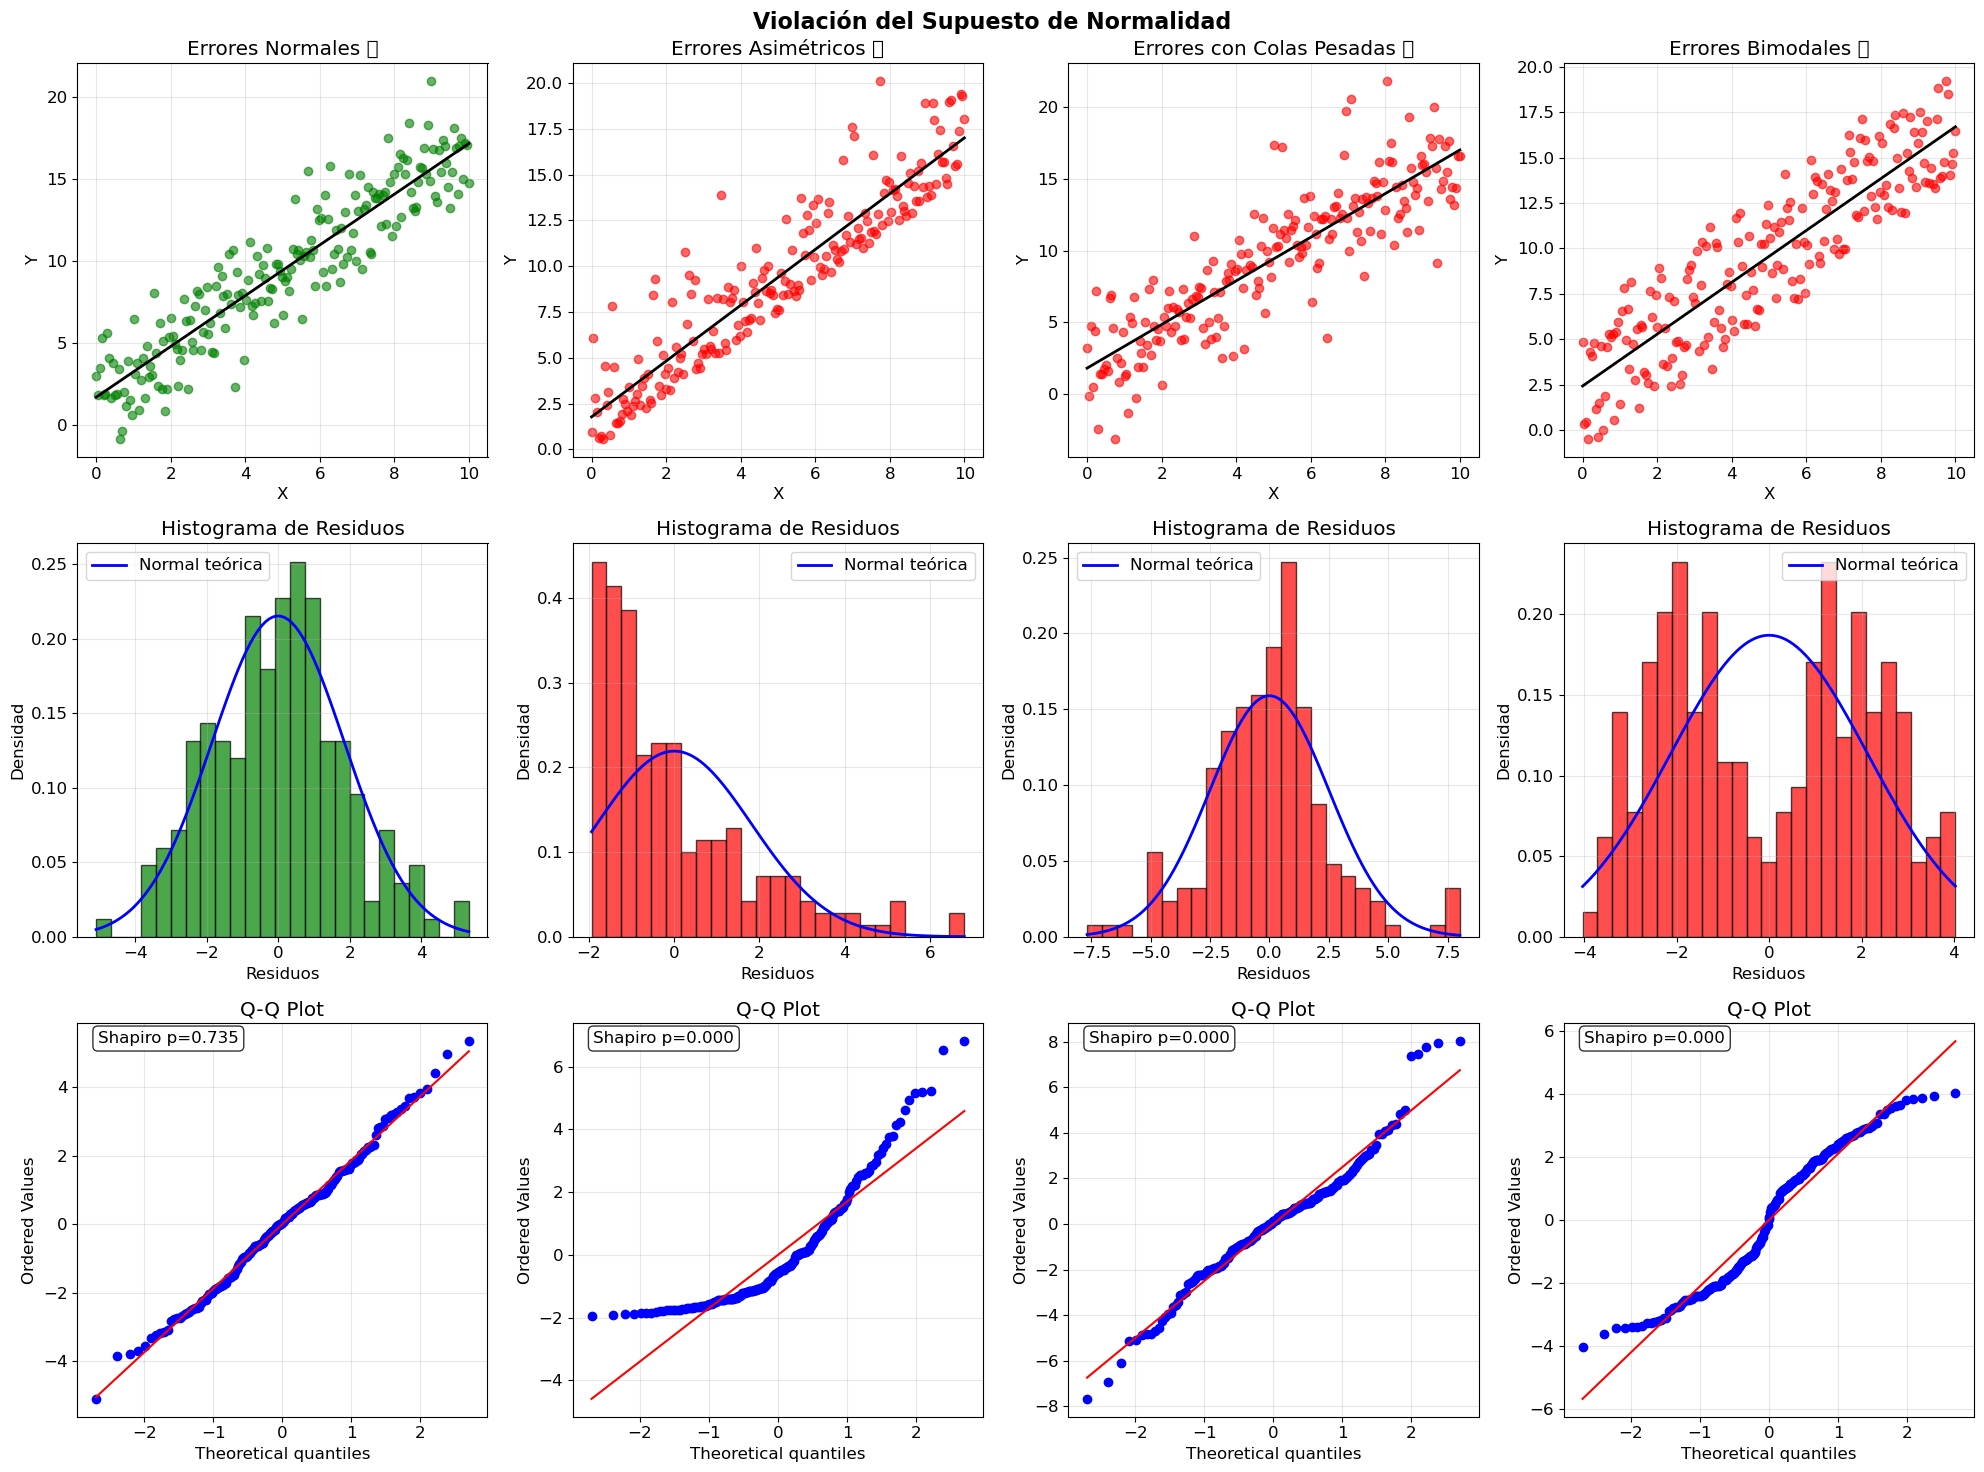

📊 INTERPRETACIÓN:
✅ Q-Q plot lineal + Shapiro p > 0.05 = Normalidad
❌ Q-Q plot no lineal + Shapiro p < 0.05 = No normalidad

🔍 PATRONES EN Q-Q PLOTS:
- Curva S: Asimetría
- Colas alejadas de la línea: Colas pesadas/ligeras
- Múltiples segmentos: Multimodalidad


In [9]:
def crear_datos_no_normales(n=200, tipo='normal', seed=42):
    """Genera datos con diferentes distribuciones de error"""
    np.random.seed(seed)
    x = np.linspace(0, 10, n)
    
    if tipo == 'normal':
        error = np.random.normal(0, 2, n)
        titulo = "Errores Normales ✅"
    elif tipo == 'asimetrico':
        # Distribución asimétrica (exponencial)
        error = np.random.exponential(2, n) - 2
        titulo = "Errores Asimétricos ❌"
    elif tipo == 'colas_pesadas':
        # Distribución t con colas pesadas
        error = stats.t.rvs(df=3, scale=2, size=n)
        titulo = "Errores con Colas Pesadas ❌"
    elif tipo == 'bimodal':
        # Distribución bimodal
        mask = np.random.binomial(1, 0.5, n).astype(bool)
        error = np.where(mask, 
                        np.random.normal(-2, 1, n),
                        np.random.normal(2, 1, n))
        titulo = "Errores Bimodales ❌"
    
    y = 2 + 1.5 * x + error
    return x, y, error, titulo

# Crear diferentes tipos de no normalidad
tipos_norm = ['normal', 'asimetrico', 'colas_pesadas', 'bimodal']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Violación del Supuesto de Normalidad', fontsize=16, fontweight='bold')

for i, tipo in enumerate(tipos_norm):
    x, y, error_real, titulo = crear_datos_no_normales(tipo=tipo)
    
    # Ajustar modelo
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    y_pred = lr.predict(x.reshape(-1, 1))
    residuos = y - y_pred
    
    color = 'green' if tipo == 'normal' else 'red'
    
    # Fila 1: Datos originales
    axes[0, i].scatter(x, y, alpha=0.6, color=color)
    axes[0, i].plot(x, y_pred, 'black', linewidth=2)
    axes[0, i].set_title(titulo)
    axes[0, i].set_xlabel('X')
    axes[0, i].set_ylabel('Y')
    axes[0, i].grid(True, alpha=0.3)
    
    # Fila 2: Histograma de residuos
    axes[1, i].hist(residuos, bins=25, density=True, alpha=0.7, color=color, edgecolor='black')
    
    # Superponer distribución normal teórica
    x_norm = np.linspace(residuos.min(), residuos.max(), 100)
    y_norm = stats.norm.pdf(x_norm, residuos.mean(), residuos.std())
    axes[1, i].plot(x_norm, y_norm, 'blue', linewidth=2, label='Normal teórica')
    
    axes[1, i].set_title(f'Histograma de Residuos')
    axes[1, i].set_xlabel('Residuos')
    axes[1, i].set_ylabel('Densidad')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)
    
    # Fila 3: Q-Q plot
    stats.probplot(residuos, dist="norm", plot=axes[2, i])
    axes[2, i].set_title(f'Q-Q Plot')
    axes[2, i].grid(True, alpha=0.3)
    
    # Calcular test de normalidad
    shapiro_stat, shapiro_p = stats.shapiro(residuos)
    axes[2, i].text(0.05, 0.95, f'Shapiro p={shapiro_p:.3f}', 
                    transform=axes[2, i].transAxes,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 INTERPRETACIÓN:")
print("✅ Q-Q plot lineal + Shapiro p > 0.05 = Normalidad")
print("❌ Q-Q plot no lineal + Shapiro p < 0.05 = No normalidad")
print("\n🔍 PATRONES EN Q-Q PLOTS:")
print("- Curva S: Asimetría")
print("- Colas alejadas de la línea: Colas pesadas/ligeras")
print("- Múltiples segmentos: Multimodalidad")

### Resumen de Pruebas Estadísticas para Normalidad

In [10]:
from scipy.stats import jarque_bera, anderson

print("🧪 PRUEBAS DE NORMALIDAD EN RESIDUOS\n")
print("H₀: Los residuos siguen distribución normal")
print("H₁: Los residuos NO siguen distribución normal\n")
print(f"{'Tipo':15} | {'Shapiro':>10} | {'Jarque-Bera':>12} | {'Anderson':>10} | {'Conclusión'}")
print("-" * 75)

for tipo in tipos_norm:
    x, y, _, titulo = crear_datos_no_normales(tipo=tipo)
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    residuos = y - lr.predict(x.reshape(-1, 1))
    
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(residuos)
    
    # Jarque-Bera test
    jb_stat, jb_p = jarque_bera(residuos)
    
    # Anderson-Darling test
    ad_stat, ad_critical, ad_significance = anderson(residuos, dist='norm')
    ad_result = "Rechaza" if ad_stat > ad_critical[2] else "No rechaza"  # 5% nivel
    
    # Conclusión general
    tests_reject = sum([shapiro_p < 0.05, jb_p < 0.05, ad_stat > ad_critical[2]])
    
    if tests_reject >= 2:
        conclusion = "❌ No Normal"
    elif tests_reject == 1:
        conclusion = "⚠️  Dudoso"
    else:
        conclusion = "✅ Normal"
    
    print(f"{tipo:15} | {shapiro_p:10.4f} | {jb_p:12.4f} | {ad_result:>10} | {conclusion}")

print("\n💡 Interpretación: p-value < 0.05 indica violación de normalidad")
print("💡 Anderson-Darling: Estadístico > valor crítico indica no normalidad")

🧪 PRUEBAS DE NORMALIDAD EN RESIDUOS

H₀: Los residuos siguen distribución normal
H₁: Los residuos NO siguen distribución normal

Tipo            |    Shapiro |  Jarque-Bera |   Anderson | Conclusión
---------------------------------------------------------------------------
normal          |     0.7354 |       0.7293 | No rechaza | ✅ Normal
asimetrico      |     0.0000 |       0.0000 |    Rechaza | ❌ No Normal
colas_pesadas   |     0.0003 |       0.0000 |    Rechaza | ❌ No Normal
bimodal         |     0.0000 |       0.0010 |    Rechaza | ❌ No Normal

💡 Interpretación: p-value < 0.05 indica violación de normalidad
💡 Anderson-Darling: Estadístico > valor crítico indica no normalidad


## 5. Consecuencias de Violar los Supuestos

Vamos a demostrar qué pasa cuando violamos cada supuesto en términos de:
- Precisión de las predicciones
- Validez de los intervalos de confianza
- Confiabilidad de las pruebas de hipótesis

🔄 Ejecutando simulación (esto puede tomar unos segundos...)


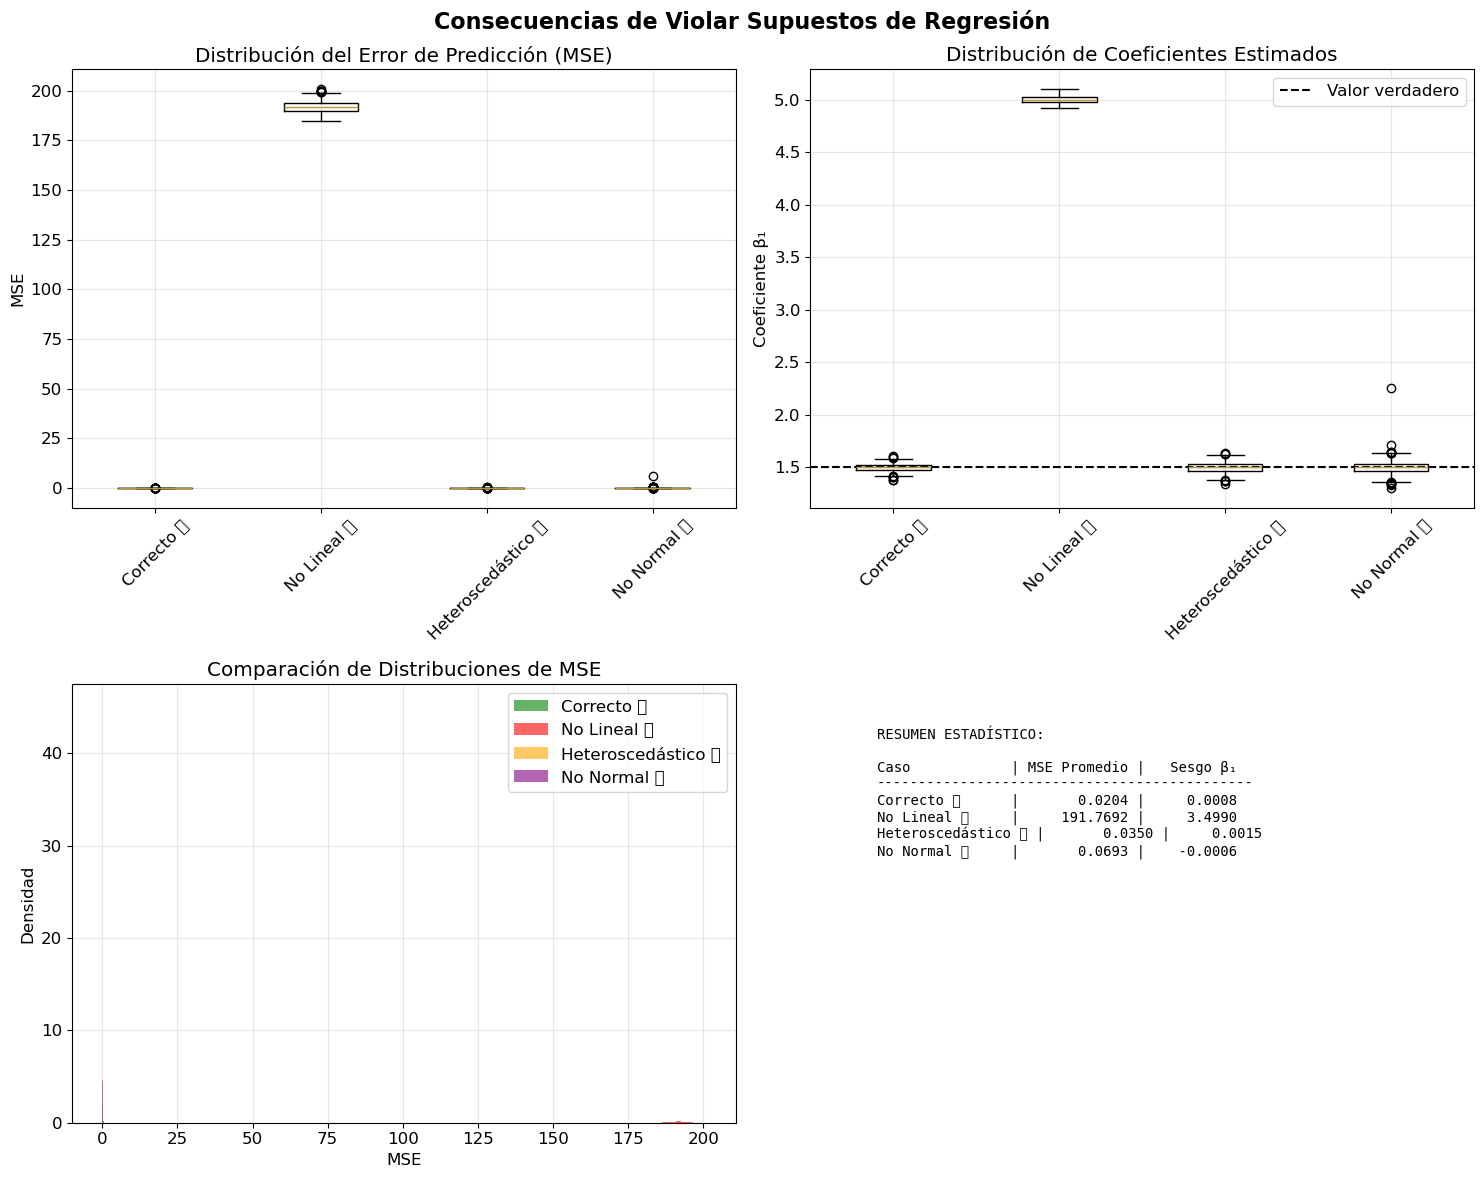


📊 CONCLUSIONES:
✅ Supuestos correctos: Estimaciones insesgadas y predicciones precisas
❌ No linealidad: Mayor error de predicción y estimaciones sesgadas
❌ Heterocedasticidad: Intervalos de confianza incorrectos
❌ No normalidad: Pruebas de hipótesis no confiables


In [11]:
def simular_consecuencias(n_simulaciones=1000, n_datos=100):
    """Simula las consecuencias de violar supuestos"""
    
    resultados = {
        'correcto': {'mse': [], 'coef_estimados': [], 'p_values': []},
        'no_lineal': {'mse': [], 'coef_estimados': [], 'p_values': []},
        'heteroscedastico': {'mse': [], 'coef_estimados': [], 'p_values': []},
        'no_normal': {'mse': [], 'coef_estimados': [], 'p_values': []}
    }
    
    coef_verdadero = 1.5  # Coeficiente real
    
    for _ in range(n_simulaciones):
        x = np.linspace(0, 10, n_datos)
        X = x.reshape(-1, 1)
        
        # Caso correcto
        y_correcto = 2 + coef_verdadero * x + np.random.normal(0, 1, n_datos)
        lr_correcto = LinearRegression().fit(X, y_correcto)
        
        # Caso no lineal (usando modelo lineal en datos cuadráticos)
        y_no_lineal = 2 + 0.5 * x**2 + np.random.normal(0, 1, n_datos)
        lr_no_lineal = LinearRegression().fit(X, y_no_lineal)
        
        # Caso heteroscedástico
        y_hetero = 2 + coef_verdadero * x + np.random.normal(0, 0.1 + 0.2 * x, n_datos)
        lr_hetero = LinearRegression().fit(X, y_hetero)
        
        # Caso no normal (distribución t)
        y_no_normal = 2 + coef_verdadero * x + stats.t.rvs(df=3, scale=1, size=n_datos)
        lr_no_normal = LinearRegression().fit(X, y_no_normal)
        
        # Calcular métricas para datos de prueba
        x_test = np.linspace(0, 10, 50).reshape(-1, 1)
        y_test_verdadero = 2 + coef_verdadero * x_test.flatten()
        
        # MSE en datos de prueba
        resultados['correcto']['mse'].append(
            mean_squared_error(y_test_verdadero, lr_correcto.predict(x_test))
        )
        resultados['no_lineal']['mse'].append(
            mean_squared_error(y_test_verdadero, lr_no_lineal.predict(x_test))
        )
        resultados['heteroscedastico']['mse'].append(
            mean_squared_error(y_test_verdadero, lr_hetero.predict(x_test))
        )
        resultados['no_normal']['mse'].append(
            mean_squared_error(y_test_verdadero, lr_no_normal.predict(x_test))
        )
        
        # Coeficientes estimados
        resultados['correcto']['coef_estimados'].append(lr_correcto.coef_[0])
        resultados['no_lineal']['coef_estimados'].append(lr_no_lineal.coef_[0])
        resultados['heteroscedastico']['coef_estimados'].append(lr_hetero.coef_[0])
        resultados['no_normal']['coef_estimados'].append(lr_no_normal.coef_[0])
    
    return resultados

print("🔄 Ejecutando simulación (esto puede tomar unos segundos...)")
resultados_sim = simular_consecuencias(n_simulaciones=500)

# Crear gráficos de resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Consecuencias de Violar Supuestos de Regresión', fontsize=16, fontweight='bold')

tipos_casos = ['correcto', 'no_lineal', 'heteroscedastico', 'no_normal']
colores = ['green', 'red', 'orange', 'purple']
nombres = ['Correcto ✅', 'No Lineal ❌', 'Heteroscedástico ❌', 'No Normal ❌']

# MSE Distribución
mse_data = [resultados_sim[caso]['mse'] for caso in tipos_casos]
axes[0, 0].boxplot(mse_data, labels=nombres)
axes[0, 0].set_title('Distribución del Error de Predicción (MSE)')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Distribución de coeficientes estimados
coef_data = [resultados_sim[caso]['coef_estimados'] for caso in tipos_casos]
axes[0, 1].boxplot(coef_data, labels=nombres)
axes[0, 1].axhline(y=1.5, color='black', linestyle='--', label='Valor verdadero')
axes[0, 1].set_title('Distribución de Coeficientes Estimados')
axes[0, 1].set_ylabel('Coeficiente β₁')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Histograma comparativo de MSE
for i, (caso, color, nombre) in enumerate(zip(tipos_casos, colores, nombres)):
    axes[1, 0].hist(resultados_sim[caso]['mse'], bins=30, alpha=0.6, 
                    color=color, label=nombre, density=True)
axes[1, 0].set_title('Comparación de Distribuciones de MSE')
axes[1, 0].set_xlabel('MSE')
axes[1, 0].set_ylabel('Densidad')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Estadísticas resumidas
axes[1, 1].axis('off')
tabla_texto = "RESUMEN ESTADÍSTICO:\n\n"
tabla_texto += f"{'Caso':15} | {'MSE Promedio':>12} | {'Sesgo β₁':>10}\n"
tabla_texto += "-" * 45 + "\n"

for caso, nombre in zip(tipos_casos, nombres):
    mse_prom = np.mean(resultados_sim[caso]['mse'])
    sesgo = np.mean(resultados_sim[caso]['coef_estimados']) - 1.5
    tabla_texto += f"{nombre:15} | {mse_prom:12.4f} | {sesgo:10.4f}\n"

axes[1, 1].text(0.1, 0.9, tabla_texto, transform=axes[1, 1].transAxes, 
                fontfamily='monospace', fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

print("\n📊 CONCLUSIONES:")
print("✅ Supuestos correctos: Estimaciones insesgadas y predicciones precisas")
print("❌ No linealidad: Mayor error de predicción y estimaciones sesgadas")
print("❌ Heterocedasticidad: Intervalos de confianza incorrectos")
print("❌ No normalidad: Pruebas de hipótesis no confiables")

## 6. Ejercicios Prácticos

### Ejercicio 1: Identificación de Violaciones

Examina los siguientes conjuntos de datos y determina qué supuestos se violan:

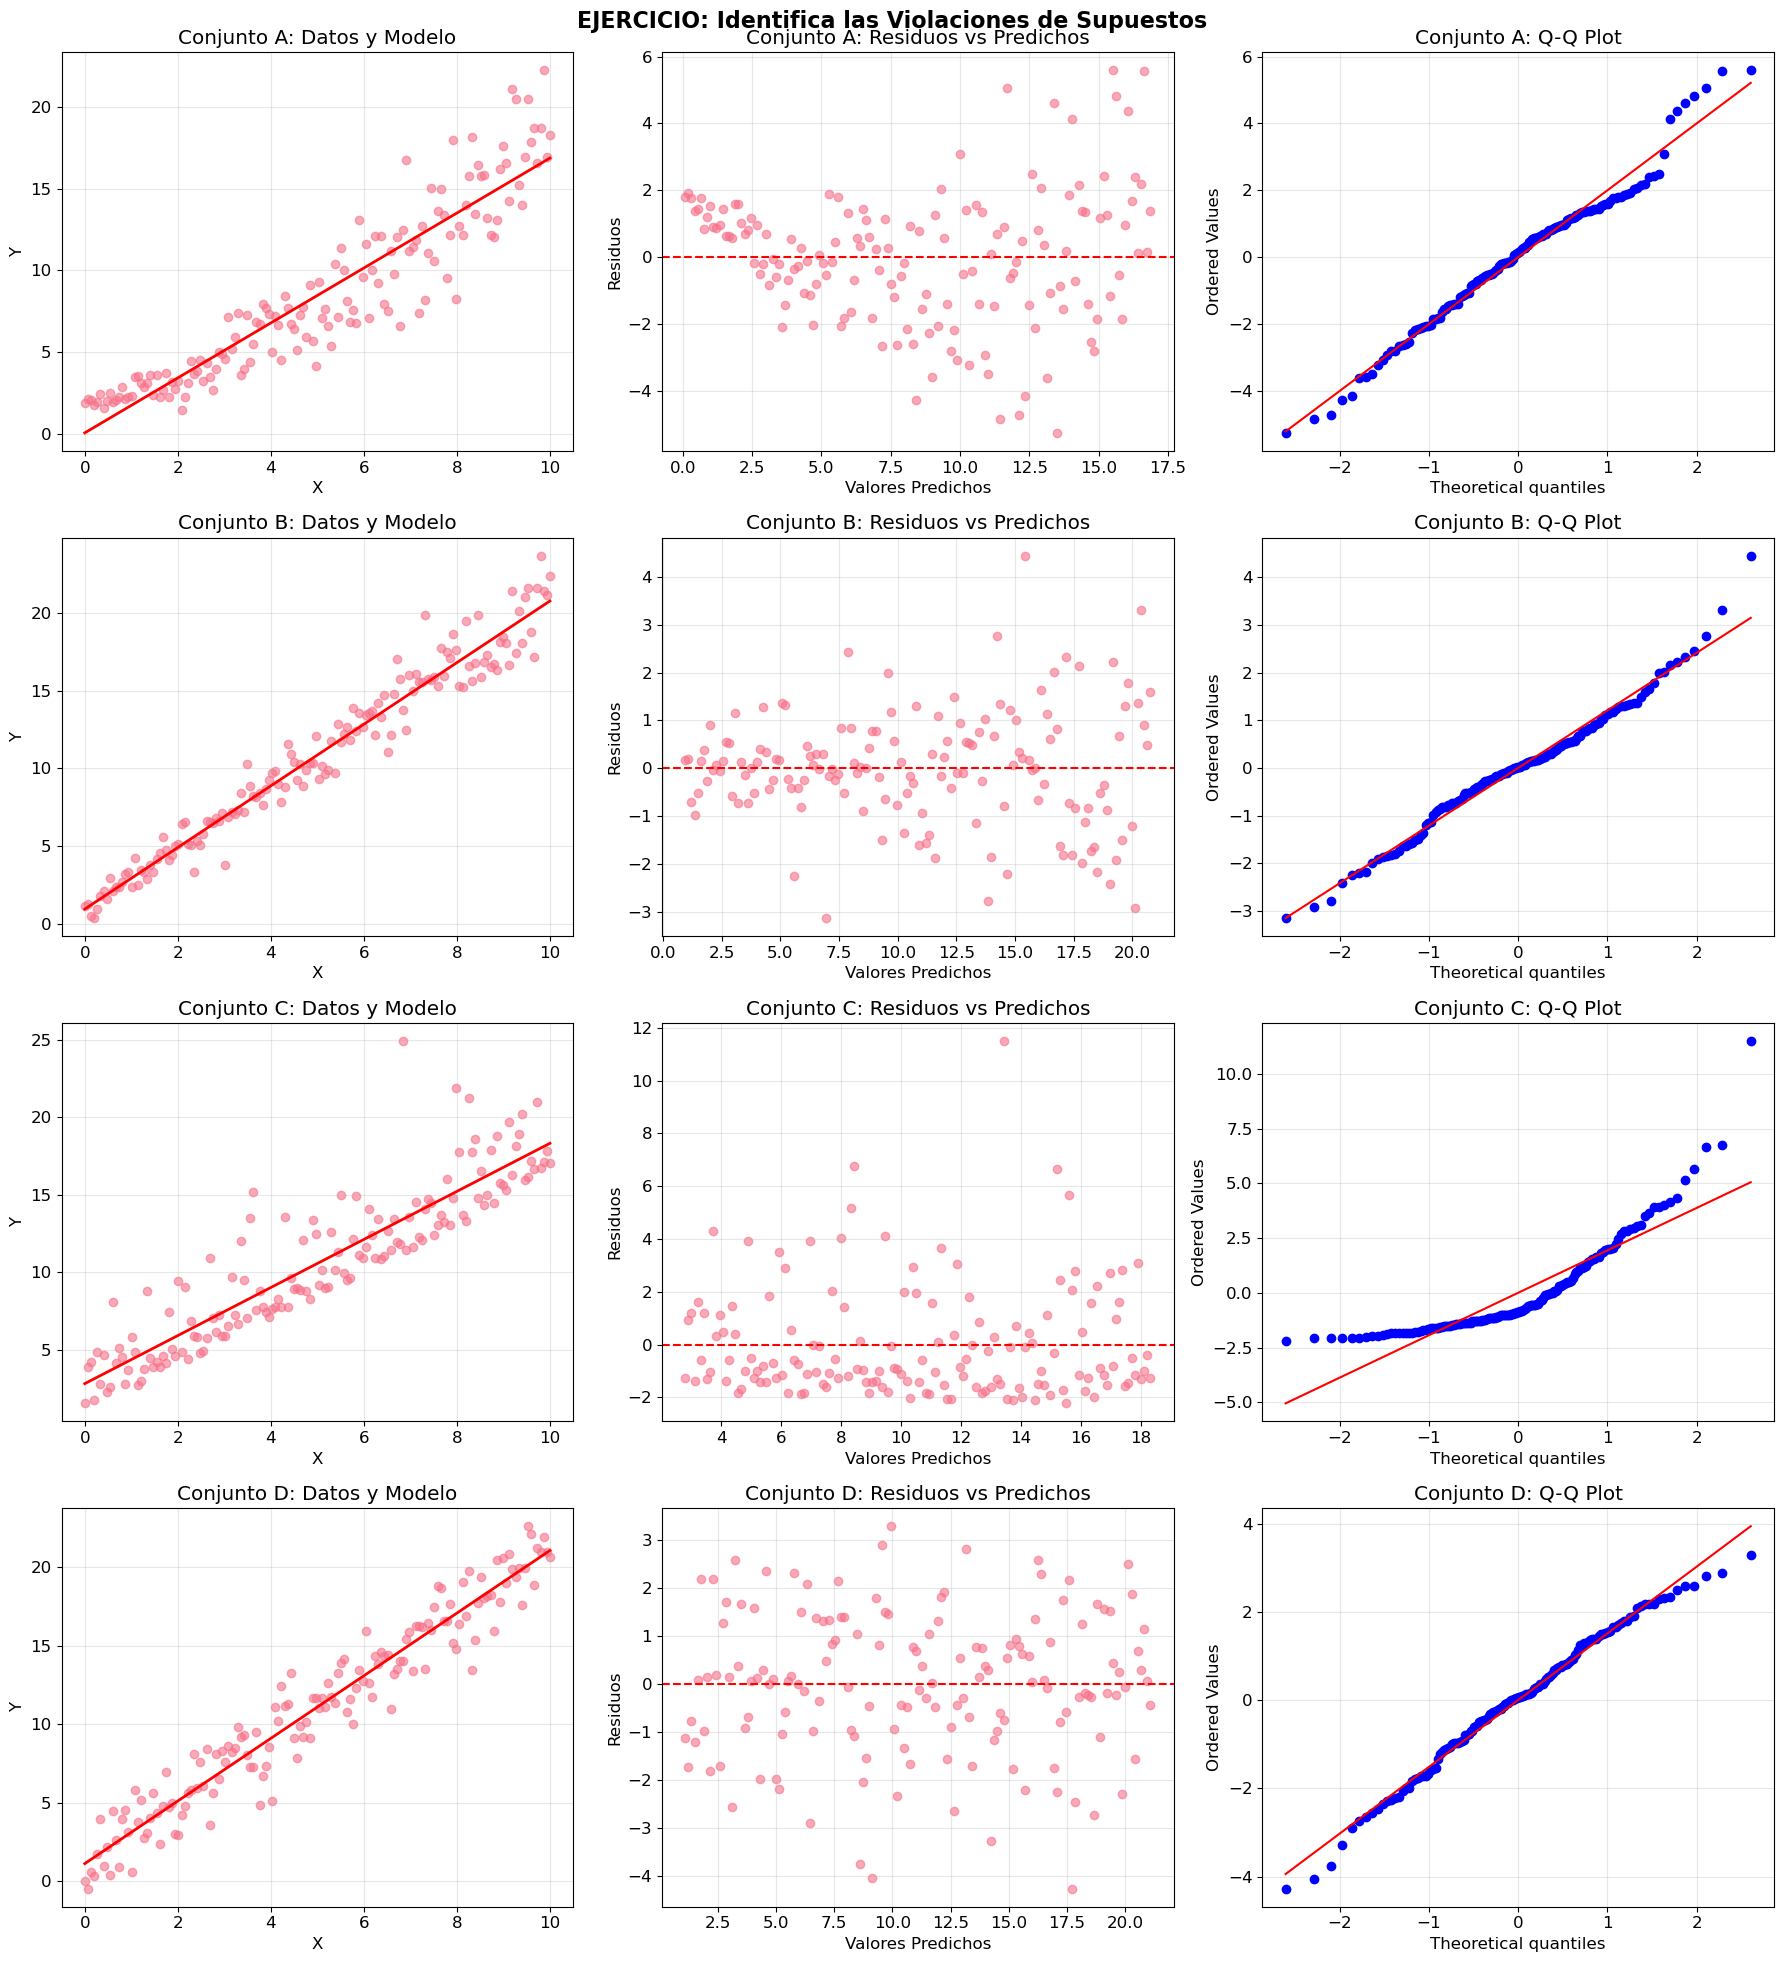

🤔 PREGUNTA: ¿Qué supuestos se violan en cada conjunto?

📝 Analiza cada fila:
- Conjunto A: ¿Qué patrones observas?
- Conjunto B: ¿Los residuos tienen varianza constante?
- Conjunto C: ¿Los residuos siguen distribución normal?
- Conjunto D: ¿Este conjunto cumple todos los supuestos?

💡 Pista: Examina los patrones en residuos y la forma del Q-Q plot


In [12]:
# Generar datos de ejercicio
np.random.seed(123)

def generar_datos_ejercicio(tipo, n=150):
    x = np.linspace(0, 10, n)
    
    if tipo == 'A':
        # Múltiples violaciones
        y = 2 + 0.5 * x**1.5 + np.random.normal(0, 0.1 + 0.3 * x, n)
    elif tipo == 'B':
        # Solo heterocedasticidad
        y = 1 + 2 * x + np.random.normal(0, 0.5 * np.sqrt(x + 1), n)
    elif tipo == 'C':
        # Solo no normalidad
        y = 3 + 1.5 * x + stats.chi2.rvs(df=2, size=n) - 2
    elif tipo == 'D':
        # Datos correctos
        y = 1 + 2 * x + np.random.normal(0, 1.5, n)
    
    return x, y

# Crear ejercicios
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('EJERCICIO: Identifica las Violaciones de Supuestos', fontsize=16, fontweight='bold')

tipos_ejercicio = ['A', 'B', 'C', 'D']

for i, tipo in enumerate(tipos_ejercicio):
    x, y = generar_datos_ejercicio(tipo)
    
    # Ajustar modelo
    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)
    y_pred = lr.predict(x.reshape(-1, 1))
    residuos = y - y_pred
    
    # Columna 1: Datos y modelo
    axes[i, 0].scatter(x, y, alpha=0.6)
    axes[i, 0].plot(x, y_pred, 'r-', linewidth=2)
    axes[i, 0].set_title(f'Conjunto {tipo}: Datos y Modelo')
    axes[i, 0].set_xlabel('X')
    axes[i, 0].set_ylabel('Y')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Columna 2: Residuos vs Predichos
    axes[i, 1].scatter(y_pred, residuos, alpha=0.6)
    axes[i, 1].axhline(y=0, color='red', linestyle='--')
    axes[i, 1].set_title(f'Conjunto {tipo}: Residuos vs Predichos')
    axes[i, 1].set_xlabel('Valores Predichos')
    axes[i, 1].set_ylabel('Residuos')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Columna 3: Q-Q Plot
    stats.probplot(residuos, dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'Conjunto {tipo}: Q-Q Plot')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🤔 PREGUNTA: ¿Qué supuestos se violan en cada conjunto?")
print("\n📝 Analiza cada fila:")
print("- Conjunto A: ¿Qué patrones observas?")
print("- Conjunto B: ¿Los residuos tienen varianza constante?")
print("- Conjunto C: ¿Los residuos siguen distribución normal?")
print("- Conjunto D: ¿Este conjunto cumple todos los supuestos?")
print("\n💡 Pista: Examina los patrones en residuos y la forma del Q-Q plot")

## 7. Resumen y Recomendaciones

### ¿Cómo diagnosticar violaciones?

| Supuesto | Herramientas de Diagnóstico | Qué Buscar |
|----------|---------------------------|------------|
| **Linealidad** | Residuos vs Predichos<br>Gráficos parciales | Patrones curvos<br>Tendencias sistemáticas |
| **Independencia** | Residuos vs Tiempo<br>Autocorrelación | Patrones temporales<br>Correlación serial |
| **Homocedasticidad** | Residuos vs Predichos<br>Test Breusch-Pagan | Forma de embudo<br>p-value < 0.05 |
| **Normalidad** | Q-Q Plot<br>Test Shapiro-Wilk | Desviación de línea recta<br>p-value < 0.05 |

### ¿Qué hacer cuando se violan?

| Violación | Soluciones Posibles |
|-----------|--------------------|
| **No Linealidad** | • Transformaciones (log, cuadrática)<br>• Modelos no lineales<br>• Splines, polinomios |
| **Dependencia** | • Modelos de series temporales<br>• Errores estándar robustos<br>• GLS con estructura de correlación |
| **Heterocedasticidad** | • Transformaciones (log Y)<br>• Errores estándar robustos<br>• Mínimos cuadrados ponderados |
| **No Normalidad** | • Transformaciones<br>• Métodos no paramétricos<br>• Modelos robustos |

### 🎯 Puntos Clave para Recordar

1. **Los gráficos de residuos son tu mejor amigo** para diagnosticar problemas
2. **Las violaciones no siempre son fatales** - depende de tu objetivo
3. **Para predicción**: La no normalidad es menos crítica
4. **Para inferencia**: Todos los supuestos son importantes
5. **Siempre visualiza antes de modelar** y después de ajustar

¡Felicidades! 🎉 Ahora tienes las herramientas para identificar y entender las violaciones de los supuestos de regresión lineal.